In [1]:
import numpy as np
import pandas as pd
import pylab as plt
import algos.shallow_nn as shallow_nn
import algos.deep_nn as deep_nn
import algos.logistic_regression as logistic_regression

In [2]:
data = pd.read_csv("datasets/breast_cancer/data.csv")
data = data.sample(frac=1).reset_index(drop=True)

data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,925291,B,11.51,23.93,74.52,403.5,0.09261,0.10210,0.11120,0.04105,...,37.16,82.28,474.2,0.12980,0.25170,0.3630,0.09653,0.2112,0.08732,NaN
1,862485,B,11.60,12.84,74.34,412.6,0.08983,0.07525,0.04196,0.03350,...,17.16,82.96,512.5,0.14310,0.18510,0.1922,0.08449,0.2772,0.08756,NaN
2,875099,B,9.72,18.22,60.73,288.1,0.06950,0.02344,0.00000,0.00000,...,20.83,62.25,303.8,0.07117,0.02729,0.0000,0.00000,0.1909,0.06559,NaN
3,907915,B,12.40,17.68,81.47,467.8,0.10540,0.13160,0.07741,0.02799,...,22.91,89.61,515.8,0.14500,0.26290,0.2403,0.07370,0.2556,0.09359,NaN
4,913535,M,16.69,20.20,107.10,857.6,0.07497,0.07112,0.03649,0.02307,...,26.56,127.30,1084.0,0.10090,0.29200,0.2477,0.08737,0.4677,0.07623,NaN


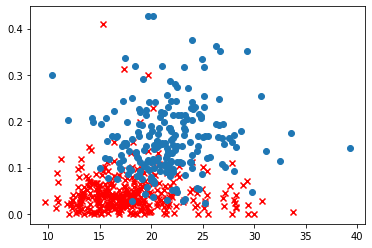

In [3]:
plt.scatter(data[data.diagnosis=="B"]["texture_mean"], data[data.diagnosis=="B"]["concavity_mean"], marker="x", color="red")
plt.scatter(data[data.diagnosis=="M"]["texture_mean"], data[data.diagnosis=="M"]["concavity_mean"], marker="o")

In [4]:
features = data.columns.values.tolist()[2:-1]

y = np.array([pd.get_dummies(data["diagnosis"])["B"]]).T
X = np.array(pd.get_dummies(data[features]))

X_train = X[:(int(len(X)*0.75)), :].T
X_val = X[(int(len(X)*0.75)):, :].T
y_train = y[:(int(len(X)*0.75)), :].T
y_val = y[(int(len(X)*0.75)):, :].T

In [5]:
X_train.shape

(30, 426)

In [6]:
lr_model = logistic_regression.model(X_train, y_train, X_val, y_val, num_iterations=10000, learning_rate=1, print_cost=True, reg_term=0.01)

Cost after iteration 0: 0.693147
Cost after iteration 1000: 0.600751
Cost after iteration 2000: 0.552590
Cost after iteration 3000: 0.516471
Cost after iteration 4000: 0.488546
Cost after iteration 5000: 0.466367
Cost after iteration 6000: 0.448357
Cost after iteration 7000: 0.433464
Cost after iteration 8000: 0.420963
Cost after iteration 9000: 0.410336
train accuracy: 85.91549295774648 %
test accuracy: 77.62237762237763 %


In [7]:
snn_model = shallow_nn.model(X_train, y_train, X_val, y_val, n_h = 20, num_iterations=10000, learning_rate=0.5, reg_term = 0.1, print_cost=True)

Cost after iteration 0: 0.693156
Cost after iteration 1000: 0.639451
Cost after iteration 2000: 0.468637
Cost after iteration 3000: 0.402301
Cost after iteration 4000: 0.376874
Cost after iteration 5000: 0.366277
Cost after iteration 6000: 0.361310
Cost after iteration 7000: 0.358774
Cost after iteration 8000: 0.357408
Cost after iteration 9000: 0.356647
Cost after iteration 9999: 0.382854
train accuracy: 88.73239436619718 %
test accuracy: 48.25174825174825 %


In [16]:
layer_dims = [30, 20, 10, 5, 1]

nn_model = deep_nn.model(X_train, y_train, X_val, y_val, layers_dims=layer_dims, activation = "relu", reg_term=0.001, learning_rate = 0.01, print_cost = True, num_iterations=2000)

Cost after iteration 0: 0.6932262644040605
Cost after iteration 200: 0.6763025340482122
Cost after iteration 400: 0.6702674984608076
Cost after iteration 600: 0.6679110601935236
Cost after iteration 800: 0.6670092689939114
Cost after iteration 1000: 0.6666639900310681
Cost after iteration 1200: 0.6665312976651657
Cost after iteration 1400: 0.6664801443529478
Cost after iteration 1600: 0.6664603824588996
Cost after iteration 1800: 0.6664527373664889
Cost after iteration 1999: 0.6664497860949485
train accuracy: 61.502347417840376 %
test accuracy: 66.43356643356643 %


In [9]:
predictions = np.squeeze(shallow_nn.predict(snn_model["parameters"],  X_val))


# output = pd.DataFrame({'Sex': np.squeeze(X_val.T[:, 3]), 'Predictions': predictions, 'Actual': np.squeeze(y_val)})
output = pd.DataFrame({'Prediction': np.squeeze(y_val), 'Survived': predictions})
output.to_csv('mamo.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!
